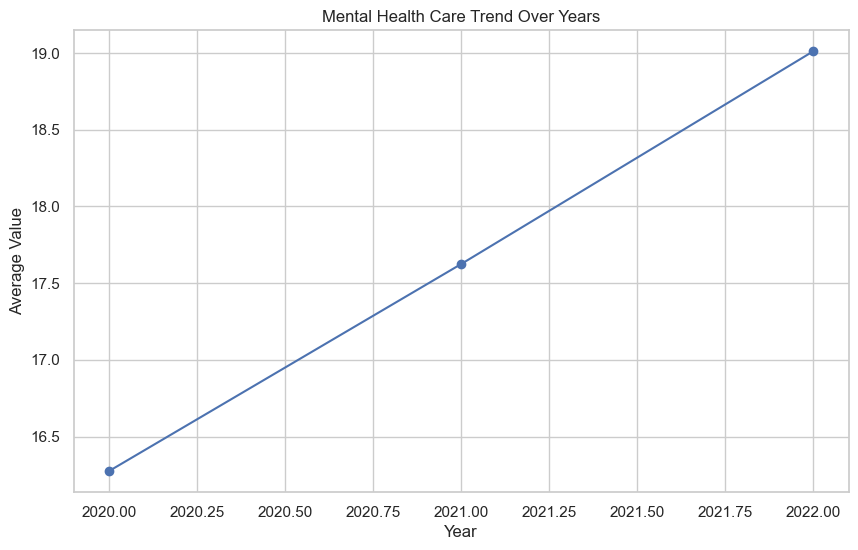

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


data = pd.read_csv('/Users/parikshitkaushal/Downloads/Mental_Health_Care_in_the_Last_4_Weeks.csv')
sns.set(style="whitegrid")

# Parse date and extract Year
if 'Time Period Start Date' in data.columns:
    data['Time Period Start Date'] = pd.to_datetime(data['Time Period Start Date'], errors='coerce')
    data['Year'] = data['Time Period Start Date'].dt.year

# 1️⃣ Trend Over Years
plt.figure(figsize=(10,6))
data.groupby('Year')['Value'].mean().plot(marker='o')
plt.title('Mental Health Care Trend Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')
plt.grid(True)
plt.show()



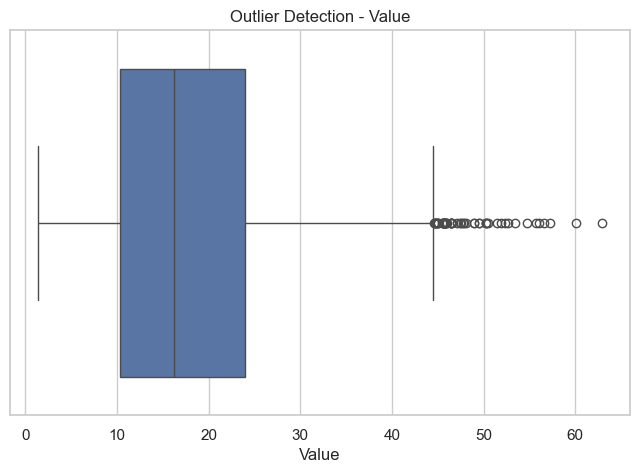

In [4]:

# 2️⃣ Outlier Detection using Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Value'])
plt.title('Outlier Detection - Value')
plt.show()

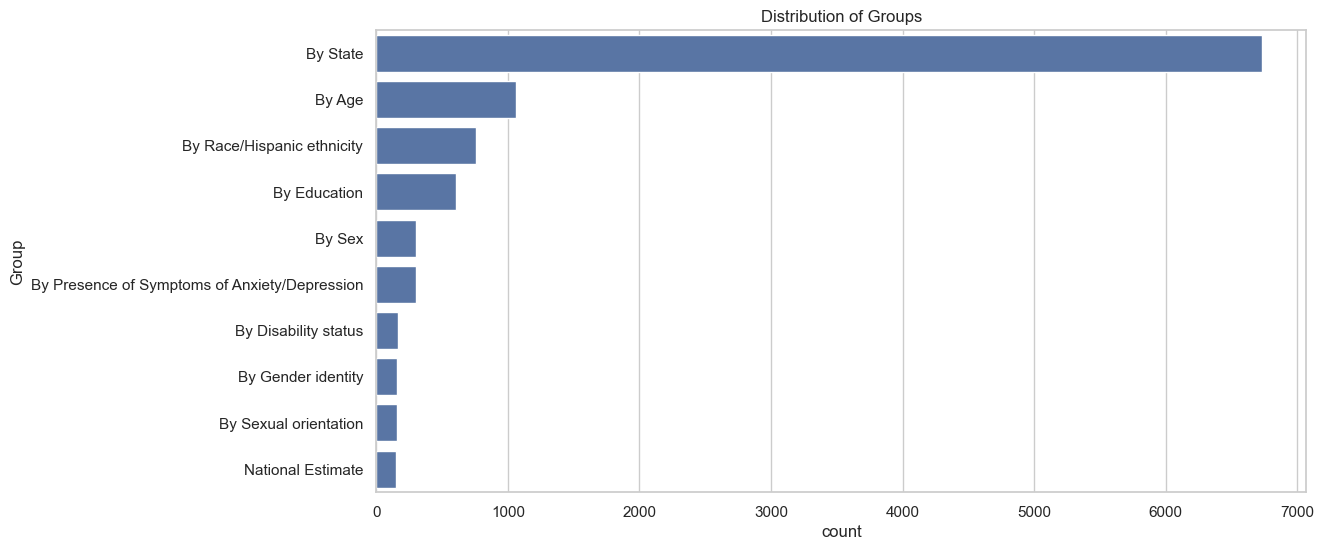

In [6]:

# 3️⃣ Bar Plot Showing Distribution of Groups
plt.figure(figsize=(12,6))
sns.countplot(y='Group', data=data, order=data['Group'].value_counts().index)
plt.title('Distribution of Groups')
plt.show()


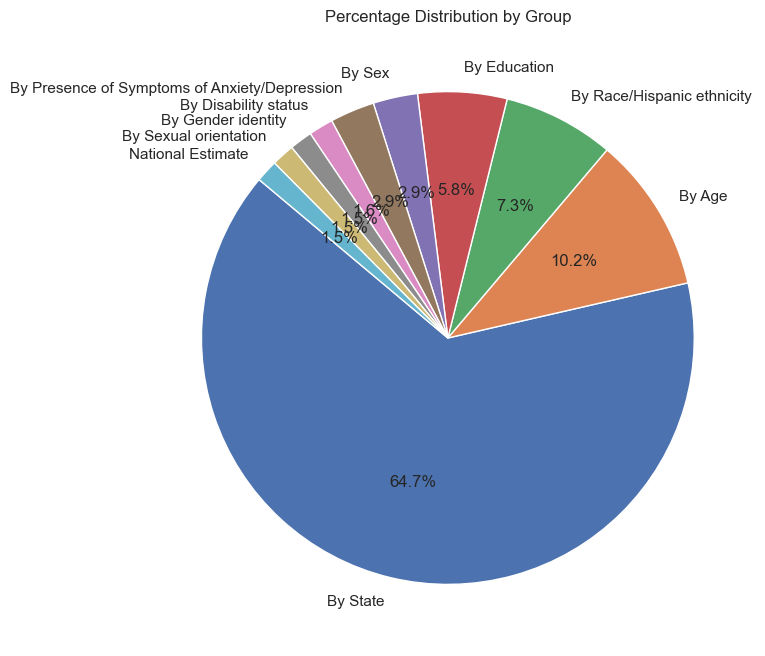

In [8]:

# 4️⃣ Pie Chart Showing Percentage Distribution by Group
plt.figure(figsize=(8,8))
data['Group'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution by Group')
plt.ylabel('')
plt.show()


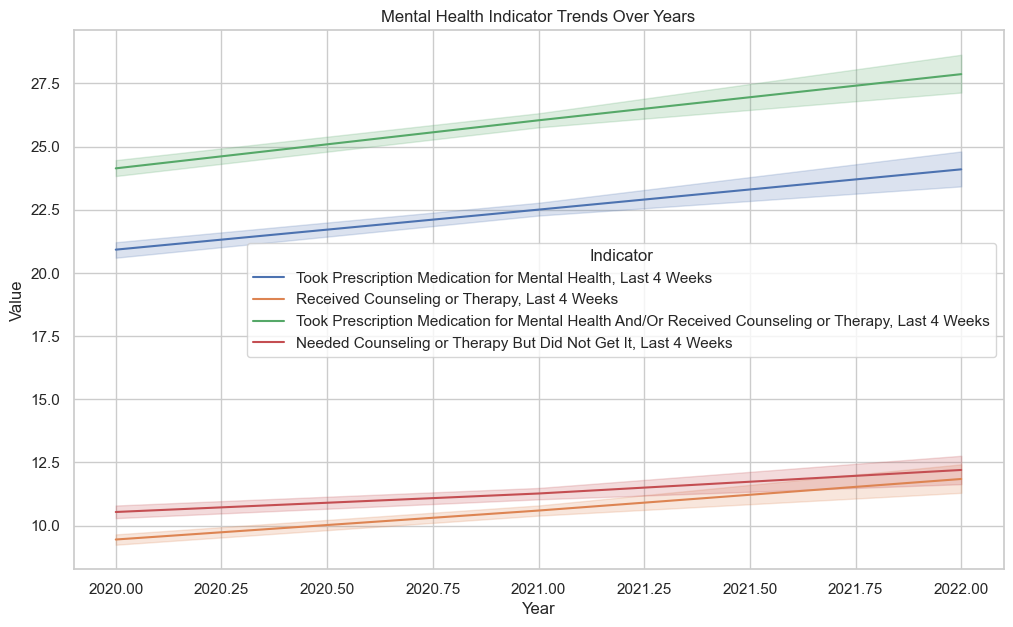

In [10]:


# 5️⃣ Type of Indicator Trend Over Years
plt.figure(figsize=(12,7))
sns.lineplot(data=data, x='Year', y='Value', hue='Indicator', estimator='mean')
plt.title('Mental Health Indicator Trends Over Years')
plt.show()



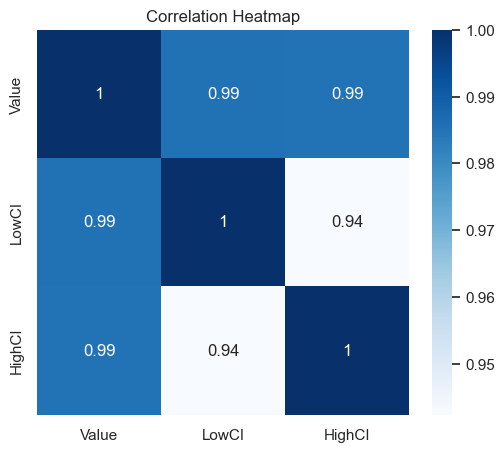

In [12]:
# 6️⃣ Correlation Heatmap Between Numeric Columns
numeric_cols = ['Value', 'LowCI', 'HighCI']
plt.figure(figsize=(6,5))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


/var/folders/xn/p9lmfn2n6wq11xx8_8w7kz7r0000gn/T/ipykernel_57051/4206665181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subgroups.index, y=top_subgroups.values, palette='viridis')


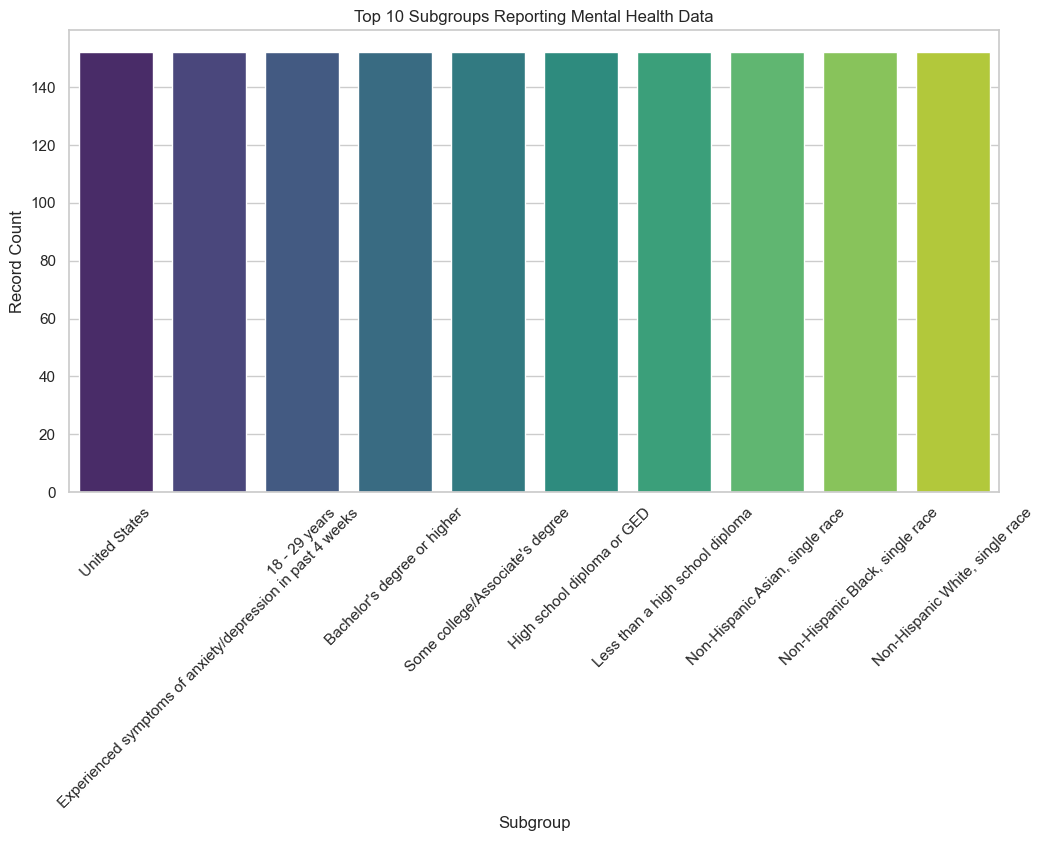

In [14]:

# 7️⃣ Top 10 Subgroups (Replacing Agencies)
top_subgroups = data['Subgroup'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_subgroups.index, y=top_subgroups.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Subgroups Reporting Mental Health Data')
plt.ylabel('Record Count')
plt.show()



/var/folders/xn/p9lmfn2n6wq11xx8_8w7kz7r0000gn/T/ipykernel_57051/2589111294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_groups.index, y=top_groups.values, palette='rocket')


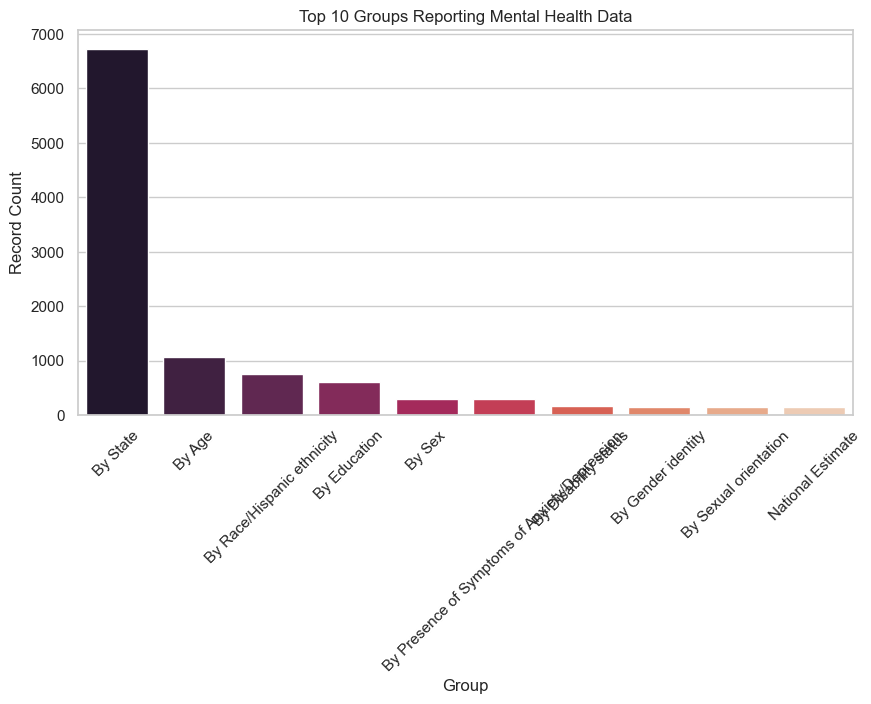

In [16]:


# 8️⃣ Top 10 Groups (Replacing Counties)
top_groups = data['Group'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_groups.index, y=top_groups.values, palette='rocket')
plt.xticks(rotation=45)
plt.title('Top 10 Groups Reporting Mental Health Data')
plt.ylabel('Record Count')
plt.show()



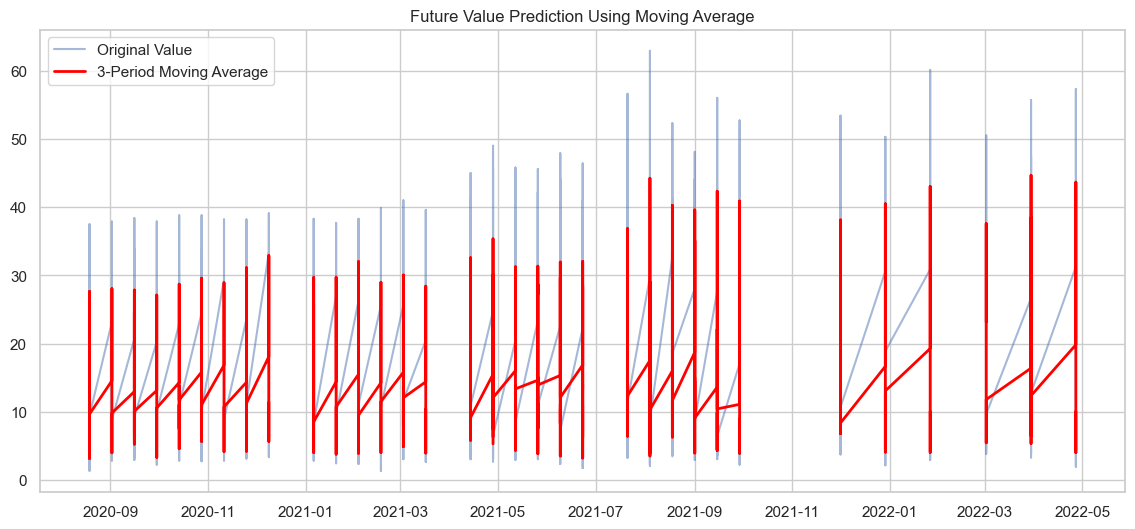

In [18]:



# 9️⃣ Future Value Prediction Using Moving Average
time_sorted = data.sort_values('Time Period Start Date').set_index('Time Period Start Date')
time_sorted['Moving_Avg'] = time_sorted['Value'].rolling(window=3).mean()

plt.figure(figsize=(14,6))
plt.plot(time_sorted.index, time_sorted['Value'], label='Original Value', alpha=0.5)
plt.plot(time_sorted.index, time_sorted['Moving_Avg'], label='3-Period Moving Average', linewidth=2, color='red')
plt.legend()
plt.title('Future Value Prediction Using Moving Average')
plt.show()



In [29]:

# 🔟 Z-Test: Value Before and After 2010
before_2021 = data[data['Year'] < 2021]['Value'].dropna()
after_2021 = data[data['Year'] >= 2021]['Value'].dropna()

if len(before_2021) > 0 and len(after_2021) > 0:
    z_stat, p_value = stats.ttest_ind(before_2021, after_2021)
    print(f"Z-Test Result:\nZ-Statistic = {z_stat:.2f}\nP-Value = {p_value:.4f}")
else:
    print("⚠️ Not enough data before and after 2020 for a valid Z-Test.")


Z-Test Result:
Z-Statistic = -8.45
P-Value = 0.0000
